# Linear regression

Goals:
- hand-code the linear regression algorithm on toy dataset
- train the algorithm
- estimate the error

## Import basic libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

## Create a toy dataset

In [2]:
N = 100
D = 2

# data is normally distributed with mean data_mu and variance data_sigma
data_mu = .5
data_sigma = 1

# we believe that there is a "true" underlying dependency x2 = true_w * x1 + true_b
# and if some x2 do not land on the line exactly, its due to an error
true_w = 4.5
true_b = 2.5

# error is normally distributed random variable with mean err_mu and variance err_sigma
# that is, the error is sum of many different random influences
err_mu = 0
err_sigma = 1.5

# make up the dataset
data = np.empty([N, D], dtype=float)
data[:, 0] = data_sigma * np.random.randn(N) + data_mu
data[:, 1] = err_sigma * np.random.randn(N) + err_mu # errors
data[:, 1] = data[:, 0] * true_w + true_b + data[:, 1]

# peek into the dataset
data[:5]

array([[ 0.40526666,  4.85108246],
       [ 0.07975303,  3.96510977],
       [ 1.1364527 ,  8.95598313],
       [-1.49347322, -2.55523997],
       [-0.14123236, -0.34107672]])

## Plot the toy dataset

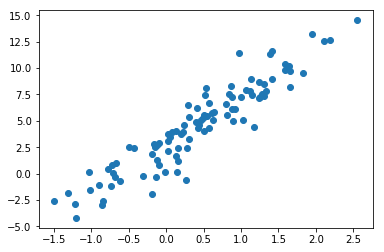

In [3]:
plt.scatter(data[:, 0], data[:, 1])
plt.show()

## Model the relationship

In [4]:
# Our model is: x2 = w * x1 + b

# initial values for w and b
w = 1.0
b = 0.0

# predicts target values according to the model
def predict(X):
    return X * w + b

# predictions
Y = predict(data[:, 0])
Y[:5]

array([ 0.40526666,  0.07975303,  1.1364527 , -1.49347322, -0.14123236])

### Untrained regression

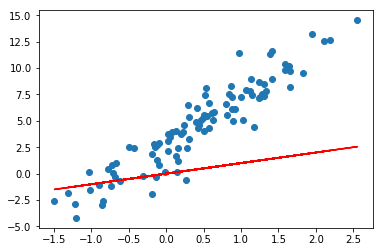

In [5]:
# plot predictions
plt.scatter(data[:, 0], data[:, 1])
plt.plot(data[:, 0], Y, color='red')

In [6]:
# Calculate mean squared error
def mean_squared_error(T, Y):
    return np.square(Y - T).mean()

# error on untrained model
mean_squared_error(data[:, 1], Y)

28.029600618563812

## Train the model

### Split into training set and validation set

In [7]:
X_train = data[:-20, 0]
T_train = data[:-20, 1]

X_test = data[-20:, 0]
T_test = data[-20:, 1]

### Plot the train and test data

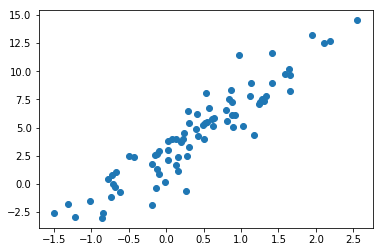

In [8]:
plt.scatter(X_train, T_train)

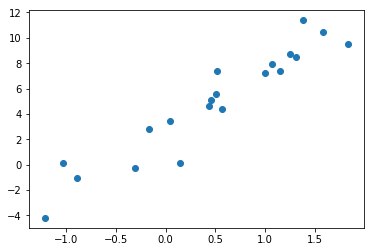

In [9]:
plt.scatter(X_test, T_test)

### Gradient descent

In [10]:
# initial parameters
w = 1.0
b = 0.0

# learning rate
alpha = 0.01

# error_delta
err_delta = 0.01

# get starting error
Y_train = predict(X_train)
err_prev = mean_squared_error(T_train, Y_train)

# counter
cnt = 0

while True:
    # print error every 10 steps
    if cnt % 10 == 0:
        print('error: ' + str(err_prev))
    cnt = cnt + 1
    
    # gradient descent
    grad_w = ((Y_train - T_train) * X_train).mean()
    grad_b = (Y_train - T_train).mean()
    w = w - alpha * grad_w
    b = b - alpha * grad_b
    
    # re-evaluate model
    Y_train = predict(X_train)
    err = mean_squared_error(T_train, Y_train)

    # check if trained
    if abs(err - err_prev) < err_delta:
        break
    err_prev = err
    

print('final error: ' + str(err))
print('iterations: ' + str(cnt))

error: 27.217162850441888
error: 21.3262831100781
error: 16.8304499668508
error: 13.398576779745866
error: 10.778226752266136
error: 8.77692221812942
error: 7.24789642319912
error: 6.079231814737007
error: 5.185579867079868
error: 4.501848820852725
error: 3.9783915751963597
error: 3.577337161743132
error: 3.2697939874698094
error: 3.0337176440413365
error: 2.852285333243811
error: 2.7126565024899207
final error: 2.614579545078994
iterations: 159


### Validate the model

In [11]:
Y_test = predict(X_test)
validation_err = mean_squared_error(T_test, Y_test)
validation_err

2.52357775002887

### Plot the prediction line

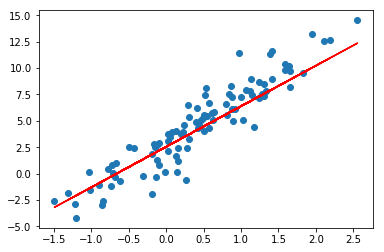

In [12]:
Y = predict(data[:, 0])
plt.scatter(data[:, 0], data[:, 1])
plt.plot(data[:, 0], Y, color='red')

## Conclusions

Gradient descent with learning rate = 0.01 allowed training model in 159 iterations, achieving error of 2.524 on validation set